# Принятие решений в бизнесе. Проектная работа.

Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки интернет-магазина. Мне, как аналитику, необходимо приоритизировать гипотезы, провести A/B-тест и проанализировать результаты. Работа будет состоять из двух частей:
 
**Часть 1. Приоритизация гипотез.**

*В этой части будут решены следующие задачи:*

- Применим фреймворк `ICE` для приоритизации гипотез и отсортируем их по убыванию приоритета.
- Применим фреймворк `RICE` для приоритизации гипотез и отсортируем их по убыванию приоритета.
- Укажем, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясним, почему так произошло.

**Часть 2. Анализ A/B-теста**

*В этой части мы проанализируем результаты A/B-теста:*

1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8. Посчитаем точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примем решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Описание данных**

В нашем распоряжении три датасета:

* **hypothesis.csv** (хранит 9 гипотез по увеличению выручки интернет-магазина):
    - `Hypothesis` — краткое описание гипотезы;
    - `Reach` — охват пользователей по 10-балльной шкале;
    - `Impact` — влияние на пользователей по 10-балльной шкале;
    - `Confidence` — уверенность в гипотезе по 10-балльной шкале;
    - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

* Датасеты **orders.csv** и **visitors.csv** (хранят результаты A/B-тестов):
    - **orders.csv**:
        - `transactionId` — идентификатор заказа;
        - `visitorId` — идентификатор пользователя, совершившего заказ;
        - `date` — дата, когда был совершён заказ;
        - `revenue` — выручка заказа;
        - `group` — группа A/B-теста, в которую попал заказ.
    - **visitors.csv**:
        - `date` — дата;
        - `group` — группа A/B-теста;
        - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста    

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Предустановки](#setup)
    * [Установка необходимых библиотек](#setup1)
    * [Установка необходимых настроек](#setup2)
    * [Создание необходимых функций для автоматизации исследования](#setup3)  
* [Загрузка данных и подготовка их к анализу](#load_data)
    * [Выводы](#load_data1)
* [Приоритизация гипотез](#prior_hyp)
    * [Выводы](#prior_hyp1)
* [Анализ A/B-теста](#ab_test)
    * [График кумулятивной выручки по группам](#ab_test1)
        * [Выводы](#ab_test2)
    * [График кумулятивного среднего чека по группам](#ab_test3)
        * [Выводы](#ab_test4)
    * [График относительного изменения кумулятивного среднего чека группы B к группе A](#ab_test5)
        * [Выводы](#ab_test6)
    * [График кумулятивного среднего количества заказов на посетителя (конверсии) по группам](#ab_test7)
        * [Выводы](#ab_test8)
    * [График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#ab_test9)
        * [Выводы](#ab_test10)
    * [График количества заказов по пользователям](#ab_test11)
        * [Выводы](#ab_test12)
    * [Расчет 95-й и 99-й перцентилей количества заказов на пользователя](#ab_test13)
        * [Выводы](#ab_test14)
    * [График стоимостей заказов](#ab_test15)
        * [Выводы](#ab_test16)
    * [Рассчет 95-й и 99-й перцентилей стоимостей заказов](#ab_test17)
        * [Выводы](#ab_test18)
    * [Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#ab_test19)
        * [Выводы](#ab_test20)
    * [Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#ab_test21)
        * [Выводы](#ab_test22)
    * [Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#ab_test23)
        * [Выводы](#ab_test24)
    * [Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#ab_test25)
        * [Выводы](#ab_test26)
    * [Общие выводы по результатам A/B-теста](#ab_test27)
* [Общие выводы по исследованию](#conclusion_project)

<a id="setup"></a>
## Предустановки

<a id="setup1"></a>
### Установка необходимых библиотек

In [1]:
# установим необходимые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import datetime as dt
import warnings

<a id="setup2"></a>
### Создание необходимых настроек

In [2]:
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)
# убираем предупреждения
warnings.filterwarnings("ignore")
# установим стиль отображения графика
sns.set(style='white')

<a id="setup3"></a>
### Создание необходимых функций для автоматизации исследования

In [3]:
# функция вывода основных данных по датафрейму
def first_data(df):
    print('Первые 5 строк датафрейма:')      
    display(df.head())
    print()
    print('Общая информамия по каждому столбцу датафрейма:')

    stat_df = pd.DataFrame({
        'count': df.count(), 
        'count_isna': df.isna().sum(),
        'perc_isna%': df.isna().mean()*100,   
        'nunique': df.nunique(),    
        'min': df.min(),
        'max': df.max(),
        'dtype':df.dtypes
                       }).reset_index()
    stat_df.rename(columns={'index': 'columns'}, inplace=True)
    stat_df['columns'] = pd.Categorical(stat_df['columns'], categories=df.columns, ordered=True)
    stat_df = stat_df.sort_values('columns').set_index('columns')
    display(stat_df.reset_index())
    print(f'Количесвтво строк-дубликатов в датафрейме: {df.duplicated().sum()}')

In [4]:
def add_underscores(list_col):
    list_new_name = []
    for name in list_col:
        new_name = ''
        for i, char in enumerate(name):
            if char.isupper() and i != 0:
                new_name += '_'  # Добавляем нижнее подчеркивание
            new_name += char  # Добавляем текущий символ
        list_new_name.append(new_name)  # Добавляем модифицированное имя в результат
    return list_new_name

In [5]:
# функция расчета метрик
def data_metrics(orders_df, visit_df):
    # суммируем выручку с группировкой по датам. Добавим количество продаж. Та же добавим средний чек по датам
    cumulative_df = (
        orders_df.loc[orders_df['group'] == 'A'].groupby(['date'], as_index=False).
        agg(cnt_orders_a=('transaction_id', 'count'),
            group_rev_sum_a=('revenue', 'sum'),
           group_rev_mean_a=('revenue', 'mean')).
        merge(orders_df.loc[orders_df['group'] == 'B'].groupby('date', as_index=False).
              agg(cnt_orders_b=('transaction_id', 'count'),
                  group_rev_sum_b=('revenue', 'sum'),
                  group_rev_mean_b=('revenue', 'mean')), on='date')
    )

    # рассчитаем кумулятивную выручку по группам A и B
    cumulative_df['cum_rev_a'] = cumulative_df['group_rev_sum_a'].cumsum()
    cumulative_df['cum_rev_b'] = cumulative_df['group_rev_sum_b'].cumsum()

    # рассчитаем кумулятивный средний чек по группам A и B
    cumulative_df['cum_mean_a'] = cumulative_df['group_rev_sum_a'].cumsum() / cumulative_df['cnt_orders_a'].cumsum()
    cumulative_df['cum_mean_b'] = cumulative_df['group_rev_sum_b'].cumsum() / cumulative_df['cnt_orders_b'].cumsum()

    # создадим датасет visits_ab_df 
    visits_ab_df = (
        visit_df.loc[visit_df['group'] == 'A'].groupby(['date'], as_index=False). 
        agg(cnt_visits_a=('visitors', 'first')).
        merge(visit_df.loc[visit_df['group'] == 'B'].groupby('date', as_index=False).
              agg(cnt_visits_b=('visitors', 'first')), on='date')
    )

    # объединим датасеты cumulative_df и visits_ab_df по дате
    cumulative_df = cumulative_df.merge(visits_ab_df[['date', 'cnt_visits_a', 'cnt_visits_b']], on='date')
    # рассчитаем конверсию для групп A и B
    cumulative_df['cum_convers_a'] = cumulative_df['cnt_orders_a'].cumsum() / cumulative_df['cnt_visits_a'].cumsum()
    cumulative_df['cum_convers_b'] = cumulative_df['cnt_orders_b'].cumsum() / cumulative_df['cnt_visits_b'].cumsum()

    # получим количество заказов для каждого пользователя группы А
    orders_per_users_df_a = (
        orders_df.loc[orders_df['group'] == 'A']
        .groupby(['visitor_id'], as_index=False)['transaction_id']
        .nunique()
    ).rename(columns={'transaction_id': 'val_orders'})

    # получим количество заказов для каждого пользователя группы B
    orders_per_users_df_b = (
        orders_df.loc[orders_df['group'] == 'B']
        .groupby(['visitor_id'], as_index=False)['transaction_id']
        .nunique()
    ).rename(columns={'transaction_id': 'val_orders'})
    
    # подготовим данные для рассчета статисчтческой значимости
    sample_a = pd.concat([orders_per_users_df_a['val_orders'], 
                         pd.Series(0,index=np.arange(cumulative_df['cnt_visits_a'].sum() - len(orders_per_users_df_a)),
                                   name='orders')], axis=0)

    sample_b = (pd.concat([orders_per_users_df_b['val_orders'], 
                         pd.Series(0,index=np.arange(cumulative_df['cnt_visits_b'].sum() - len(orders_per_users_df_b)),
                                   name='orders')], axis=0))

    return cumulative_df, sample_a, sample_b

In [6]:
# функция сравнения p-value
def check_pvalue(result, alpha):
    print(f'р-значение равно {result}')
    if result < alpha:    
        print('Отвергаем нулевую теорию: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

In [7]:
# тест Шапиро-Уилка
def shapiro(data_a, data_b, alpha = 0.05):
    statistic_a, p_value_a = stats.shapiro(data_a)
    statistic_b, p_value_b = stats.shapiro(data_b)
    print(f'р-значения двух групп {p_value_a} и {p_value_b}')
    if p_value_a < alpha or p_value_b < alpha:    
        print('Отвергаем нулевую гипотезу. Данные не распределены нормально. Необходимо использовать U-тест Манна-Уитни')
    else:
        print('Данные распределены нормально. Можно использовать t-тест')

In [8]:
# тест Манна-Уитни
def mannwhitneyu(data_a, data_b, alpha = 0.05):
    statistic, p_value = stats.mannwhitneyu(data_a, data_b)
    check_pvalue(p_value, alpha)

[Оглавление](#ogl)

<a id="load_data"></a>
## Загрузка данных и подготовка их к анализу

In [9]:
# загрузим данные в переменные
hypo_data = pd.read_csv('/datasets/hypothesis.csv')
orders_data = pd.read_csv('/datasets/orders.csv')
visit_data = pd.read_csv('/datasets/visitors.csv')

Исходя из описания данных датафреймов, мы видим, что некоторые столбцы имеют некорерктный стиль написания имен. Сразу исправим это

In [10]:
# пройдемся циклом по трем датафреймам и приведем имена к единому стилю. Выведем содержимое датасетов на экран
for i in [hypo_data, orders_data, visit_data]:
    # устанавливаем нижнее подчеркивание перед заглавными буквами
    i.columns = add_underscores(i.columns.to_list())
    # приведем имена столбцов к единому стилю написания
    i.columns = i.columns.str.lower()

In [11]:
# получим первые данные о датафрейме hypo_df
first_data(hypo_data)

Первые 5 строк датафрейма:


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1



Общая информамия по каждому столбцу датафрейма:


,columns,count,count_isna,perc_isna%,nunique,min,max,dtype
0,hypothesis,9,0,0.000,9,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа","Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",object
1,reach,9,0,0.000,6,1,10,int64
2,impact,9,0,0.000,7,1,10,int64
3,confidence,9,0,0.000,7,1,9,int64
4,efforts,9,0,0.000,6,1,10,int64


Количесвтво строк-дубликатов в датафрейме: 0


К датасету **hypo_data** никаких вопросов нет. Все типы данных соответствуют своим значениям, имена столбцов приведены в соответствие единому стилю.

In [12]:
# получим первые данные о датафрейме orders_df
first_data(visit_data)

Первые 5 строк датафрейма:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Общая информамия по каждому столбцу датафрейма:


,columns,count,count_isna,perc_isna%,nunique,min,max,dtype
0,date,62,0,0.000,31,2019-08-01,2019-08-31,object
1,group,62,0,0.000,2,A,B,object
2,visitors,62,0,0.000,58,361,770,int64


Количесвтво строк-дубликатов в датафрейме: 0


In [13]:
# Приведем данные столбца date к типу datetime
visit_data['date'] = pd.to_datetime(visit_data['date']).dt.date

Столбец **date** был приведен в соответствие типу данных. К остальным столбцам вопросов нет. Нет дубликатов и пропусков данных.

In [14]:
# получим первые данные о датафрейме orders_df
first_data(orders_data)

Первые 5 строк датафрейма:


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Общая информамия по каждому столбцу датафрейма:


,columns,count,count_isna,perc_isna%,nunique,min,max,dtype
0,transaction_id,1197,0,0.000,1197,1062393,4293855558,int64
1,visitor_id,1197,0,0.000,1031,5114589,4283872382,int64
2,date,1197,0,0.000,31,2019-08-01,2019-08-31,object
3,revenue,1197,0,0.000,713,50,1294500,int64
4,group,1197,0,0.000,2,A,B,object


Количесвтво строк-дубликатов в датафрейме: 0


In [15]:
# Приведем данные столбца date к типу datetime
orders_data['date'] = pd.to_datetime(orders_data['date']).dt.date

Одним из условий проведения качественного A/B-теста является то, что каждый пользрователь на протяжении всего выполнениея A/B-теста должен входить только в одну группу. Это связано с тем, что если пользователь попал в разные группы, значит мы не можем знать, что конкретно побудило его к целевому действию. Таким образом подобные данные являются некорректными и способны исказить результаты проведения A/B-теста. Проверим группы на наличие подобных пользователей

In [16]:
# проверим, есть ли пользователи, которые входят в обе группы A и B 
user_all_group = (
    orders_data.loc[orders_data['group'] == 'A'].groupby(['visitor_id'], as_index=False)
          .agg(group_a=('visitor_id', 'count')).
    merge(orders_data.loc[orders_data['group'] == 'B'].groupby('visitor_id', as_index=False)
          .agg(group_b=('visitor_id', 'count')), on='visitor_id')
)
print(f"{len(user_all_group)} пользователей попали в обе группы при проведении A/B-теста. Это {round(len(user_all_group) / orders_data['visitor_id'].nunique(), 2)}% от общего числа всех пользователей")

58 пользователей попали в обе группы при проведении A/B-теста. Это 0.06% от общего числа всех пользователей


58 пользователей попали в обе группы. Выяснить причину, по которой это произошло, без дополнительных данных не представляется возможным. Равно как и определить к какой группе они изначально должны были принадлежать. Общий процент этих пользователей от общего числа составляет 0.06% Удалим их

In [17]:
orders_data = orders_data.loc[~orders_data['visitor_id'].isin(user_all_group['visitor_id'])]

<a id="load_data1"></a>
### Выводы:

Во всех трех загруженных и изученных нами датафреймах таблицы с датами имели тип данных object и были переведены в формат datetime. Так же все имена столбцов были приведены к единому стилю. В датафрейме **orders_df** пользователи, которые попали в обе группы, были удалены. Строк-дубликатов нигде обнаружено не было. Данные готовы для дальнейшего анализа

[Оглавление](#ogl)

<a id="prior_hyp"></a>
## Приоритизация гипотез

Применим фреймворк **ICE** для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [18]:
hypo_data['ice'] = hypo_data['impact'] * hypo_data['confidence'] / hypo_data['efforts']
hypo_data.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


Применим фреймворк **RICE** для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [19]:
hypo_data['rice'] = hypo_data['impact'] * hypo_data['confidence'] * hypo_data['reach'] / hypo_data['efforts']
hypo_data.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.000


Как видно из двух таблиц, по обоим методам приоритизации задач, в ТОП-5 попали одни и те же гипотезы. Отличие лишь в том, что метод **RICE** о отличие от метода приоритизации **ICE**, учитывает еще и какое количество пользователей затронет гипотеза. Выведем ТОП-5 гипотез на экран

In [20]:
hypo_data.sort_values(['rice', 'ice'], ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.200


<a id="prior_hyp1"></a>
### Выводы:
Глядя на ТОП-5 гипотез, видно, что все они имеют очень высокую степень уверенности (столбец **confidence**), а так же среднюю или ниже среднего стоимость проверки гипотезы (столбец **efforts**). Все 5 гипотез направлены на привлечение пользователей. Либо это гипотезы по улучшению визуализации сайта, либо расширение каналов привлечения пользователей.

[Оглавление](#ogl)

<a id="ab_test"></a>
## Анализ A/B-теста

In [21]:
# обратимся к функции data_metrics для расчета необходимых нам данных
cumulative_df, sample_a, sample_b = data_metrics(orders_data, visit_data)

<a id="ab_test1"></a>
### График кумулятивной выручки по группам

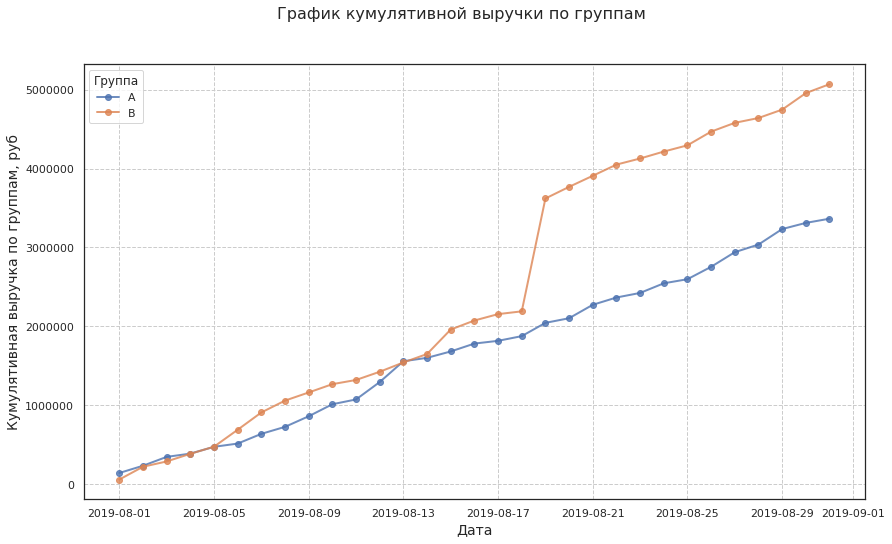

In [22]:
# построим график кумулятивной выручки по группам
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График кумулятивной выручки по группам', fontsize=16)
ax.plot(cumulative_df['date'], cumulative_df['cum_rev_a'], label='А', marker='o', alpha=0.8, linewidth=2)
ax.plot(cumulative_df['date'], cumulative_df['cum_rev_b'], label='B', marker='o', alpha=0.8, linewidth=2)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Кумулятивная выручка по группам, руб', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
ax.legend(title='Группа');

На графике у группы B от 19 августа виден сильный "скачок". Посмотроим на продажи этой группы за интересующее нас число. Выведем первые 5 строк датасета в порядке убывания

In [23]:
(
    orders_data.loc[(orders_data['group'] == 'B') & (orders_data['date'] == pd.to_datetime('2019-08-19'))]
    .sort_values('revenue', ascending=False)
    .head()
)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


Как и ожидалось, 19 августа была аномально высокая продажа на сумму более одного миллиона рублей.

<a id="ab_test2"></a>
#### Выводы:
Обе группы демонстрируют прирост выручки на протяжении всего теста. У пользователей группы B есть очень сильный "скачок" в данных за 19 августа. Как мы выяснили, это произошло из-за аномально высокой продажи. Если убрать эту аномальную продажу, то в общем-то графики прироста выручки обоих групп достаточно похожи и сопоставимы. Немного лучше дела обстоят у группы B.

[Оглавление](#ogl)

<a id="ab_test3"></a>
### График кумулятивного среднего чека по группам

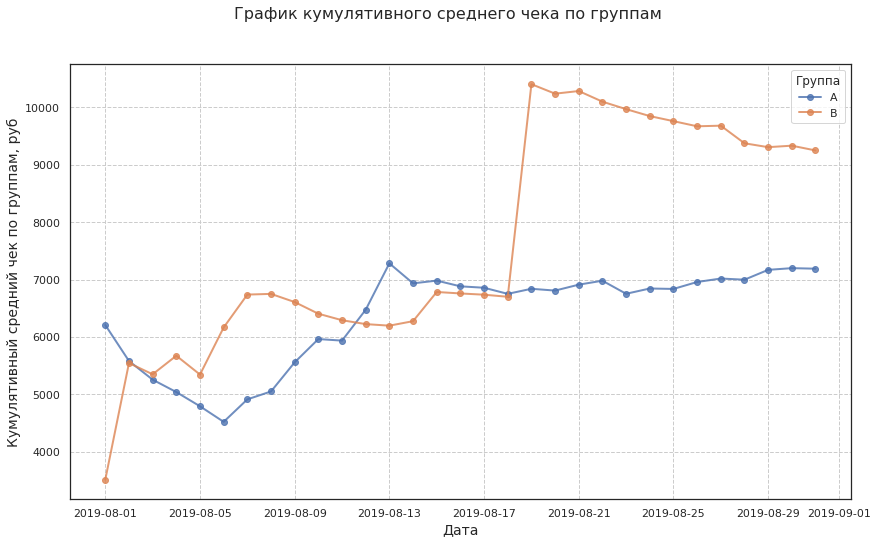

In [24]:
#построим график кумулятивного среднего чека по группам
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График кумулятивного среднего чека по группам', fontsize=16)
ax.plot(cumulative_df['date'], cumulative_df['cum_mean_a'], label='А', marker='o', alpha=0.8, linewidth=2)
ax.plot(cumulative_df['date'], cumulative_df['cum_mean_b'], label='B', marker='o', alpha=0.8, linewidth=2)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Кумулятивный средний чек по группам, руб', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
ax.legend(title='Группа');

<a id="ab_test4"></a>
#### Выводы:
Графики обоих групп за первые 15 дней теста имеют очень сильные колебания. Далее, благодаря накопительному эффекту средних значений, графики стабилизируются. На графике группы B мы видит то же самый сильный всплеск из-за аномально высокой продажи от 19 августа. "Благодаря" этому сильному всплеску, после можно наблюдать достаточно сильное снижение значения среднего чека для группы B

[Оглавление](#ogl)

<a id="ab_test5"></a>
### График относительного изменения кумулятивного среднего чека группы B к группе A

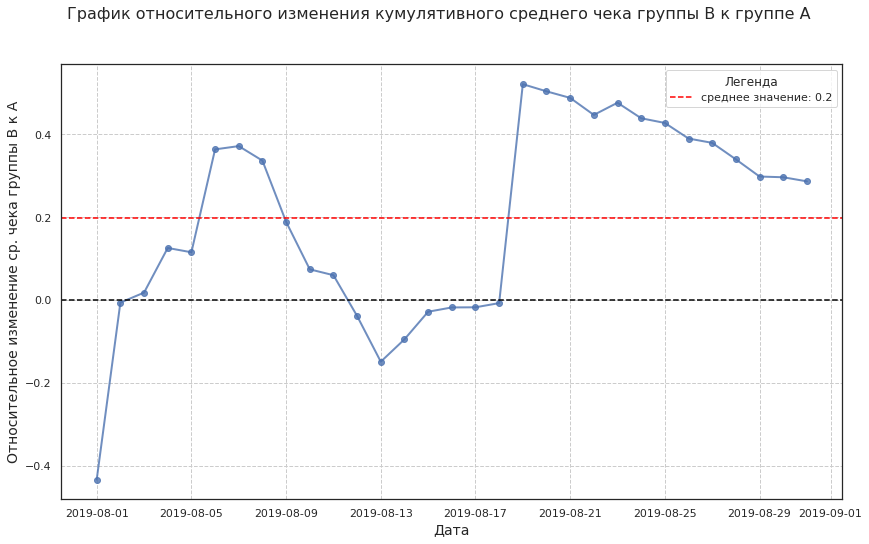

In [25]:
# построим график относительного изменения кумулятивного среднего чека группы B к группе A
cum_mean_ba = (cumulative_df['cum_mean_b'] / cumulative_df['cum_mean_a'] - 1)
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16)
ax.plot(cumulative_df['date'], cum_mean_ba, marker='o', alpha=0.8, linewidth=2)
ax.axhline(y=cum_mean_ba.mean(), label=f'среднее значение: {cum_mean_ba.mean().round(2)}', color='red', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Относительное изменение ср. чека группы B к A', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.legend(title='Легенда')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--');

<a id="ab_test6"></a>
#### Выводы:
Так же как и на графике кумулятивного среднего чека, этот график из-за сильных колебаний в первые 15 дней месяца мало информативен. Во вторую половине месяца сильное влияние на график оказывает все та же аномально высокая продажа за 19 августа. После 19 августа, из-за продажи, происходит коррекция графика в виде его снижения.

[Оглавление](#ogl)

<a id="ab_test7"></a>
### График кумулятивного среднего количества заказов на посетителя (конверсии) по группам

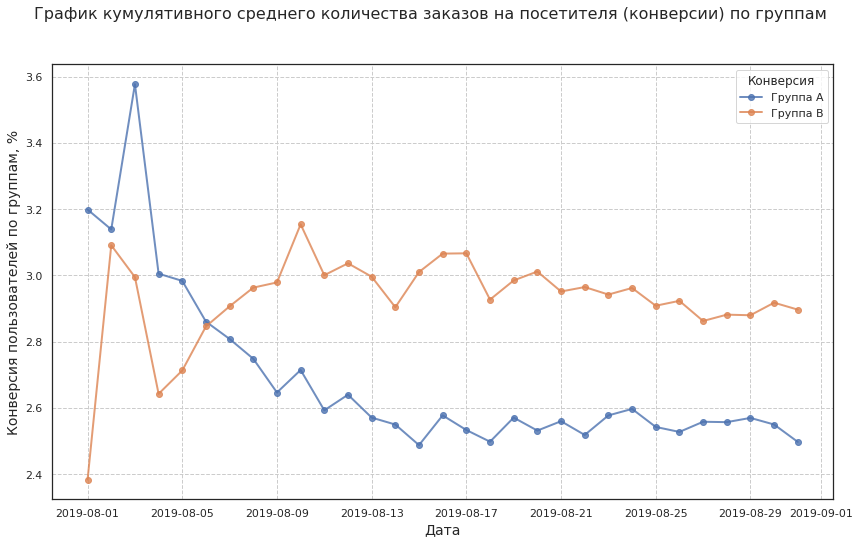

In [26]:
# построим график кумулятивного среднего количества заказов на посетителя (конверсии) по группам
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График кумулятивного среднего количества заказов на посетителя (конверсии) по группам', fontsize=16)
ax.plot(cumulative_df['date'], cumulative_df['cum_convers_a'] * 100, label='Группа А', marker='o', alpha=0.8, linewidth=2)
ax.plot(cumulative_df['date'], cumulative_df['cum_convers_b'] * 100, label='Группа B', marker='o', alpha=0.8, linewidth=2)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Конверсия пользователей по группам, %', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
ax.legend(title='Конверсия');

<a id="ab_test8"></a>
####  Выводы:
В первые 7 дней теста показатели конверсии у пользователей группы A были лучше. Затем ситуация поменялась, и в течение остальной части теста можно наблюдать стабильно лучшие показатели у пользователей группы B

[Оглавление](#ogl)

<a id="ab_test9"></a>
### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

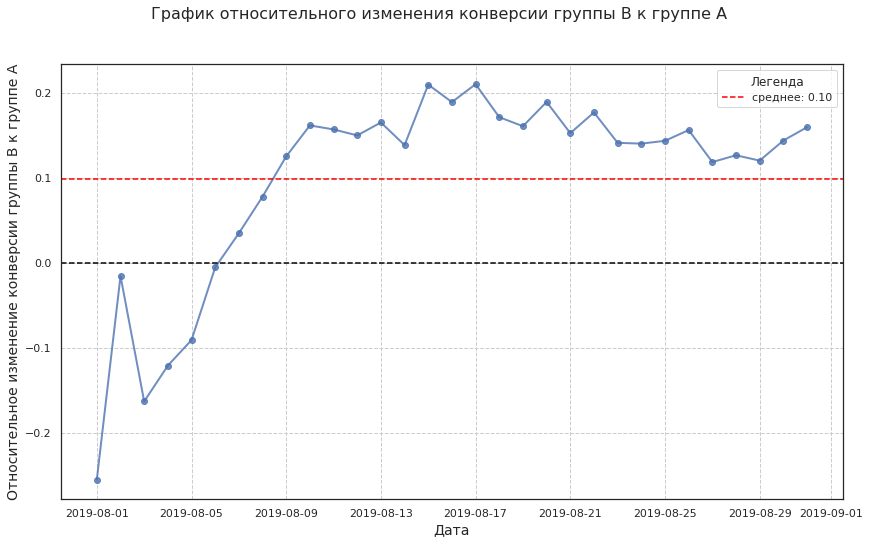

In [27]:
# построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
cum_mean_ord_user_ba = cumulative_df['cum_convers_b'] / cumulative_df['cum_convers_a'] - 1
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График относительного изменения конверсии группы B к группе A', fontsize=16)
ax.plot(cumulative_df['date'], cum_mean_ord_user_ba, marker='o', alpha=0.8, linewidth=2)
ax.axhline(y=cum_mean_ord_user_ba.mean(), label=f'среднее: {cum_mean_ord_user_ba.mean():.2f}', color='red', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Относительное изменение конверсии группы B к группе A', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.legend(title='Легенда')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--');

<a id="ab_test10"></a>
#### Выводы:
График относительного изменения конверсии лишь подтверждает сделанные ранее выводы о том, что конверсия у пользователей группы B значительно лучше конверсии другой группы

[Оглавление](#ogl)

<a id="ab_test11"></a>
### График количества заказов по пользователям

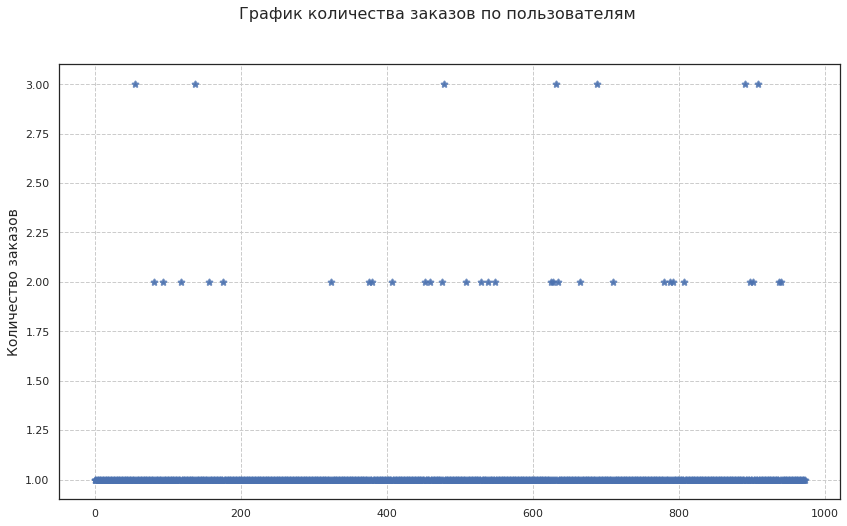

In [28]:
# рассчитаем необходимые данные для графика.
orders_per_users_df = (
    orders_data.groupby('visitor_id', as_index=False)
    .agg(
        visitor_id=('visitor_id', 'first'), 
         val_orders=('visitor_id', 'count')
    )
)
x_values = pd.Series(range(0,len(orders_per_users_df)))
# построим график количества заказов по пользователям
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График количества заказов по пользователям', fontsize=16)
ax.scatter(x_values, orders_per_users_df['val_orders'], marker='*', alpha=0.8, linewidth=2)
#ax.axhline(y=cum_mean_ord_user_ba, label=f'среднее: {cum_mean_ord_user_ba}', color='red', linestyle='--')
#ax.axhline(y=0, color='black', linestyle='--')
ax.set_ylabel('Количество заказов', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
#ax.legend(title='Легенда')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--');

<a id="ab_test12"></a>
#### Выводы:
График количества заказов по пользователям показывает, что подавляющее большинство пользователей делает только один заказ.

[Оглавление](#ogl)

<a id="ab_test13"></a>
### Расчет 95-й и 99-й перцентилей количества заказов на пользователя

Для определения аномальных значений количества покупок, рассчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [29]:
# рассчитаем 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(orders_per_users_df['val_orders'], [95, 99]))

[1. 2.]


<a id="ab_test14"></a>
#### Выводы:
95% всех пользователей совершили не более 1 заказа, и 99% совершили не более 2 заказов. Исходя из этих данных будем считать аномальными количество заказов больше 2. 

[Оглавление](#ogl)

<a id="ab_test15"></a>
### График стоимостей заказов

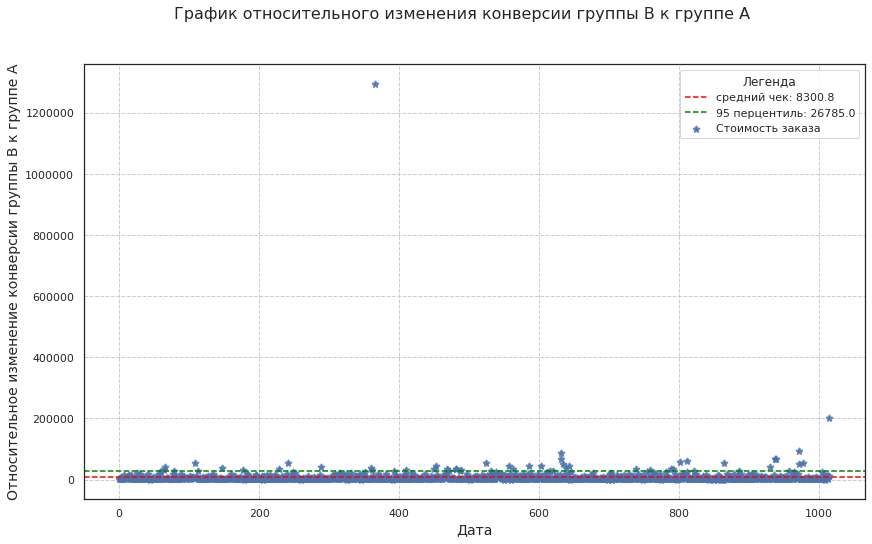

In [30]:
x_values = pd.Series(range(0,len(orders_data['revenue'])))
# построим график стоимостей заказов
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График относительного изменения конверсии группы B к группе A', fontsize=16)
ax.scatter(x_values, orders_data['revenue'], label='Стоимость заказа', marker='*', alpha=0.8, linewidth=2)
ax.axhline(y=orders_data['revenue'].mean(), label=f"средний чек: {orders_data['revenue'].mean():.1f}", color='red', linestyle='--')
ax.axhline(y=np.percentile(orders_data['revenue'],[95]), label=f"95 перцентиль: {np.percentile(orders_data['revenue'],[95])[0].round(2)}", color='green', linestyle='--')
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Относительное изменение конверсии группы B к группе A', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.legend(title='Легенда')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--');

<a id="ab_test16"></a>
#### Выводы:
На графике видно два аномальных заказа. Первый заказ стоимостью более 1000000 рублей, и второй заказ стоимостью 200000 рублей. Для более полной информации рассчитаем перцентили стоимостей заказов.

[Оглавление](#ogl)

<a id="ab_test17"></a>
### Рассчет 95-й и 99-й перцентилей стоимостей заказов

Для определения аномальных значений стоимостей заказов, рассчитаем 95-й и 99-й перцентили

In [31]:
print(np.percentile(orders_data['revenue'], [95, 99]))

[26785. 53904.]


Не очень информативно. Посмотрим на статистические показатели стоимостей заказов

In [32]:
orders_data['revenue'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99]).reset_index()

,index,revenue
0,count,1016.000
1,mean,8300.815
2,std,42121.992
3,min,50.000
4,25%,1190.000
5,50%,2955.000
6,75%,8134.250
7,95%,26785.000
8,96%,30649.000
9,97%,34792.000


<a id="ab_test18"></a>
#### Выводы:
Первое, что сразу обращает на себя внимание, это большая разница между медианным и средним знвчениями, а так же высокое стандартное отклонение. Все это в совокупности указывает на сильное смещение даных в сторону бОльших значений. Что же касается границ нормальной стоимости заказов, то с 95-го по 99-й перцентили самый большой разрыв наблюдается между 97-м и 98-м перцентилями. Установим границу нормальной стоимости заказов в пределах 34000 рублей

[Оглавление](#ogl)

<a id="ab_test19"></a>
### Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Обратившись ранее к функции *data_metrics* мы получили готовый набор данных для проведения теста. Сначала мы определили количество заказов для каждого пользователя группы А, а затем, т.к. нам необходимо получить датасет с покупками всех пользователей, добавили и тех пользователей, кто не совершал покупок. Для этого добавили к соответствующим столбцам число строк с нулевыми значениями в количестве, равном количеству пользователей, которые заходили на сайт, но не совершали покупок. Таким образом были получены датасеты **sample_a** и **sample_b** для двух разных групп пользователей.

Для того, чтобы понять какой тест для рассчета статистической значимости различий нам использовать, проверим на нормальность распределения данных с помощью теста  Шапиро-Уилка. Сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: Распределение данных нормально.

**Альтернативная гипотеза ($H_1$)**: Распределение данных ненормальное.

In [33]:
# проведем тест Шапиро-Уилка
shapiro(sample_a, sample_b)

р-значения двух групп 0.0 и 0.0
Отвергаем нулевую гипотезу. Данные не распределены нормально. Необходимо использовать U-тест Манна-Уитни


Т.к. тест Шапиро-Уилка показал, что данные имеют ненормальное распределение, то будем использовать тест Манна-Уитни. Для этого сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет

**Альтернативная гипотеза ($H_1$)**: различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть

In [34]:
# проведем тест Манна-Уитни
mannwhitneyu(sample_a, sample_b)
print(f'Относительный прирост конверсии группы B по отношению к группе A: {(sample_b.mean()/sample_a.mean()-1) * 100:.1f}%')

р-значение равно 0.011018084110014696
Отвергаем нулевую теорию: разница статистически значима
Относительный прирост конверсии группы B по отношению к группе A: 16.0%


<a id="ab_test20"></a>
#### Выводы:
По итогам проведенного теста Манна-Уитни мы выяснили, что существует статистическая значимость между конверсиями двух групп. Это  подтверждает и рассчет относительного прироста конверсии группы B по отношению к группе A в 16%. Важно так же помнить, что тесты проводились на "сырых", неочищенных от аномальных значений данных.

[Оглавление](#ogl)

<a id="ab_test21"></a>
### Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [35]:
# получим датасет со стоимостями заказов по группам
rev_mean_a = orders_data.loc[orders_data['group'] == 'A', 'revenue']
rev_mean_b = orders_data.loc[orders_data['group'] == 'B', 'revenue']

Для того, чтобы понять какой тест для рассчета статистической значимости различий в среднем чеке заказа нам использовать, проверим на нормальность распределения данных с помощью теста  Шапиро-Уилка. Сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: Распределение данных нормально.

**Альтернативная гипотеза ($H_1$)**: Распределение данных ненормальное.

In [36]:
# проведем тест Шапиро-Уилка
shapiro(rev_mean_a, rev_mean_b)

р-значения двух групп 2.8240222045454137e-31 и 4.203895392974451e-45
Отвергаем нулевую гипотезу. Данные не распределены нормально. Необходимо использовать U-тест Манна-Уитни


Т.к. тест Шапиро-Уилка показал, что данные имеют ненормальное распределение, то будем использовать тест Манна-Уитни. Для этого сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: различий в среднем чеке заказа между группами по «сырым» данным нет

**Альтернативная гипотеза ($H_1$)**: различия в среднем в среднем чеке заказа между группами по «сырым» данным есть

In [37]:
# проведем тест Манна-Уитни
mannwhitneyu(rev_mean_a, rev_mean_b)
print(f'Средний чек группы A равен {rev_mean_a.mean():.0f} рублей, группы B {rev_mean_b.mean():.0f} рублей. Разница составила {abs(rev_mean_a.mean() - rev_mean_b.mean()):.0f} рубль')

р-значение равно 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний чек группы A равен 7189 рублей, группы B 9250 рублей. Разница составила 2061 рубль


<a id="ab_test22"></a>
#### Выводы:
По итогам проведенного теста Манна-Уитни не удалось опровергнуть нулевую гипотезу о том, что различий в среднем чеке заказа между группами нет. Фактический рассчет среднего чека по группам показал разницу среднего чека между ними чуть больше 2000 рублей. Важно так же помнить, что тесты проводились на "сырых", неочищенных от аномальных значений данных.

[Оглавление](#ogl)

<a id="ab_test23"></a>
### Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее мы приняли за "нормальных" пользователей тех ,кто совершил 1-2 покупки и стоимостью заказа не более 34000 рублей. Найдем аномальные заказы

In [38]:
# найдем пользователей, которые совершили не более 2-х покупок
users_ov_2_purchase = orders_per_users_df.loc[orders_per_users_df['val_orders'] <= 2]
# отберем данные, соответствующие условиям
clear_orders_data = (
    orders_data.loc[(orders_data['revenue'] <= 34000) & (orders_data['visitor_id']).isin(users_ov_2_purchase['visitor_id'])]
)

# обратимся к функции data_metrics для расчета необходимых нам "очищенных" данных
clear_cumulative_df, clear_sample_a, clear_sample_b = data_metrics(clear_orders_data, visit_data)

Т.к. нам необходимо получить датасет с покупками всех пользователей, то добавим и тех, кто не совершал покупок. Для этого добавим к соответствующим столбцам число строк с нулевыми значениями в количестве, равном количеству пользователей, которые заходили на сайт, но не совершали покупок. Создадим соответствующие датасеты sample_a и sample_b для двух разных групп пользователей.

Для того, чтобы понять какой тест для рассчета статистической значимости различий нам использовать, проверим на нормальность распределения "очищенных" данных с помощью теста  Шапиро-Уилка. Сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: Распределение "очищенных" данных нормально.

**Альтернативная гипотеза ($H_1$)**: Распределение "очищенных" данных ненормальное.

In [39]:
# проведем тест Шапиро-Уилка
shapiro(clear_sample_a, clear_sample_b)

р-значения двух групп 0.0 и 0.0
Отвергаем нулевую гипотезу. Данные не распределены нормально. Необходимо использовать U-тест Манна-Уитни


Т.к. тест Шапиро-Уилка показал, что данные имеют ненормальное распределение, то будем использовать тест Манна-Уитни. Для этого сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет

**Альтернативная гипотеза ($H_1$)**: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть

In [40]:
# проведем тест Манна-Уитни
mannwhitneyu(clear_sample_a, clear_sample_b)
print(f'Относительный прирост конверсии группы B по отношению к группе A: {(clear_sample_b.mean()/clear_sample_a.mean()-1) * 100:.1f}%')

р-значение равно 0.007628081338801883
Отвергаем нулевую теорию: разница статистически значима
Относительный прирост конверсии группы B по отношению к группе A: 19.2%


<a id="ab_test24"></a>
#### Выводы:
По итогам проведенного теста Манна-Уитни по "очищенным" данным, мы выяснили, что по-прежнему существует статистическая значимость между конверсиями двух групп. Это  подтверждает и рассчет относительного прироста конверсии группы B по отношению к группе A в 19.2%. При этом конверсия группы B относительно группы A улучшила свои позиции на 3.2%.

[Оглавление](#ogl)

<a id="ab_test25"></a>
### Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [41]:
# получим датасет со стоимостями заказов по группам
clear_rev_mean_a = clear_orders_data.loc[clear_orders_data['group'] == 'A', 'revenue']
clear_rev_mean_b = clear_orders_data.loc[clear_orders_data['group'] == 'B', 'revenue']

Для того, чтобы понять какой тест для рассчета статистической значимости различий в среднем чеке заказа нам использовать, проверим на нормальность распределения данных с помощью теста  Шапиро-Уилка. Сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: Распределение "очищенных" данных нормально.

**Альтернативная гипотеза ($H_1$)**: Распределение "очищенных" данных ненормальное.

In [42]:
# проведем тест Шапиро-Уилка
shapiro(clear_rev_mean_a, clear_rev_mean_b)

р-значения двух групп 5.051666444087244e-24 и 2.986903806262019e-28
Отвергаем нулевую гипотезу. Данные не распределены нормально. Необходимо использовать U-тест Манна-Уитни


Т.к. тест Шапиро-Уилка показал, что данные имеют ненормальное распределение, то будем использовать тест Манна-Уитни. Для этого сформулируем две гипотезы:

**Нулевая гипотеза ($H_0$)**: различий в среднем чеке заказа между группами по "очищенным" данным нет

**Альтернативная гипотеза ($H_1$)**: различия в среднем в среднем чеке заказа между группами по "очищенным" данным есть

In [43]:
# проведем тест Манна-Уитни
mannwhitneyu(clear_rev_mean_a, clear_rev_mean_b)
print(f'Средний чек группы A равен {clear_rev_mean_a.mean():.0f} рублей, группы B {clear_rev_mean_b.mean():.0f} рубля. Разница составила {abs(round(clear_rev_mean_a.mean(), 0) - round(clear_rev_mean_b.mean(), 0)):.0f} рубля')

р-значение равно 0.8339212201183112
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний чек группы A равен 5485 рублей, группы B 5483 рубля. Разница составила 2 рубля


<a id="ab_test26"></a>
#### Выводы:
По итогам проведенного теста Манна-Уитни по "очищенным" данным по-прежнему не удалось опровергнуть нулевую гипотезу о том, что различий в среднем чеке заказа между группами нет. Фактический рассчет среднего чека по группам показал разницу среднего чека между ними всего в 2 рубля. При сравнении средних чеков "сырых" и "очищенных" данных, благодаря удалению из анализа аномальных значений, разница между средники чеками снизилась с более чем 2061 рубля до 2 рублей

<a id="ab_test27"></a>
### Общие выводы по результатам A/B-теста

Построим три графика на "очищенных" данных, на основании которого будем делать выводы о результатах A/B-теста:

* график относительной конверсии группы B к группе A по "очищенным" данным
* график относительного изменения кумулятивного среднего чека "очищенных" данных группы B к группе A
* график кумулятивной выручки по группам

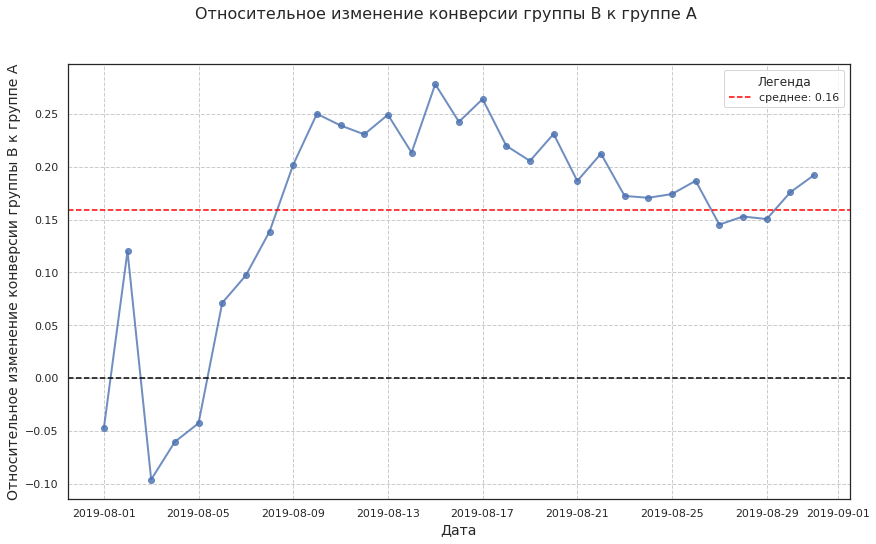

In [44]:
# построим график относительной конверсии группы B к группе A по "очищенным" данным
clear_cum_mean_ord_user_ba = clear_cumulative_df['cum_convers_b'] / clear_cumulative_df['cum_convers_a'] - 1
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('Относительное изменение конверсии группы B к группе A', fontsize=16)
ax.plot(clear_cumulative_df['date'], clear_cum_mean_ord_user_ba, marker='o', alpha=0.8, linewidth=2)
ax.axhline(y=clear_cum_mean_ord_user_ba.mean(), label=f'среднее: {clear_cum_mean_ord_user_ba.mean():.2f}', color='red', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Относительное изменение конверсии группы B к группе A', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.legend(title='Легенда')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--');

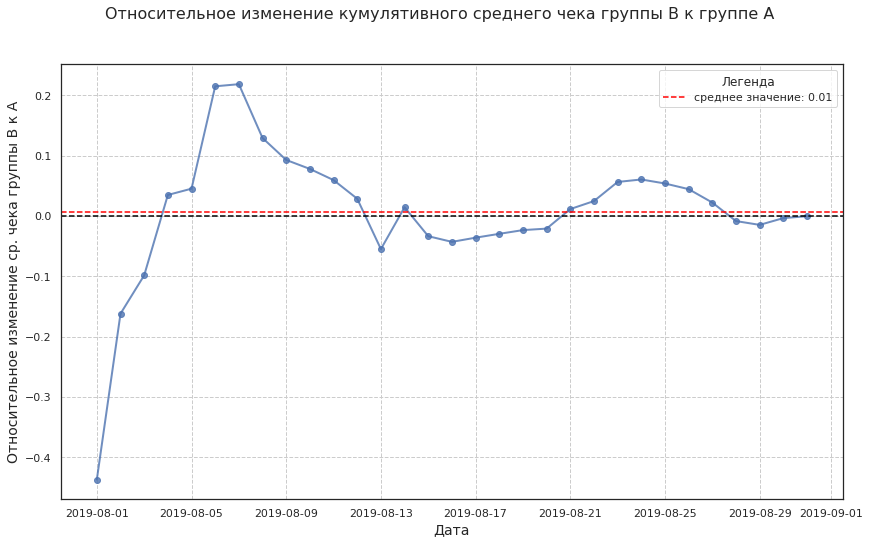

In [45]:
# построим график относительного изменения кумулятивного среднего чека "очищенных" данных группы B к группе A
clear_cum_mean_ba = (clear_cumulative_df['cum_mean_b'] / clear_cumulative_df['cum_mean_a'] - 1)
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=16)
ax.plot(clear_cumulative_df['date'], clear_cum_mean_ba, marker='o', alpha=0.8, linewidth=2)
ax.axhline(y=clear_cum_mean_ba.mean(), label=f'среднее значение: {clear_cum_mean_ba.mean().round(2)}', color='red', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Относительное изменение ср. чека группы B к A', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.legend(title='Легенда')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--');

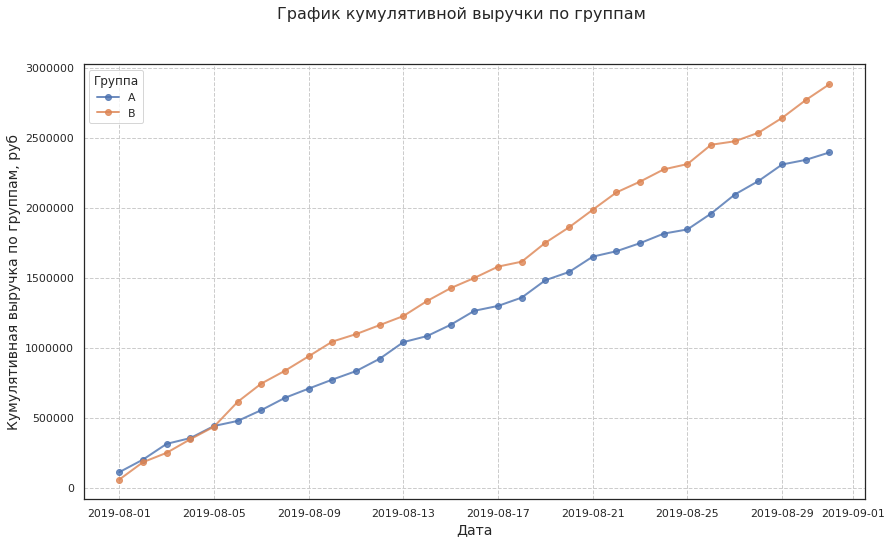

In [46]:
# построим график кумулятивной выручки по группам
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График кумулятивной выручки по группам', fontsize=16)
ax.plot(clear_cumulative_df['date'], clear_cumulative_df['cum_rev_a'], label='А', marker='o', alpha=0.8, linewidth=2)
ax.plot(clear_cumulative_df['date'], clear_cumulative_df['cum_rev_b'], label='B', marker='o', alpha=0.8, linewidth=2)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Кумулятивная выручка по группам, руб', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
ax.legend(title='Группа');

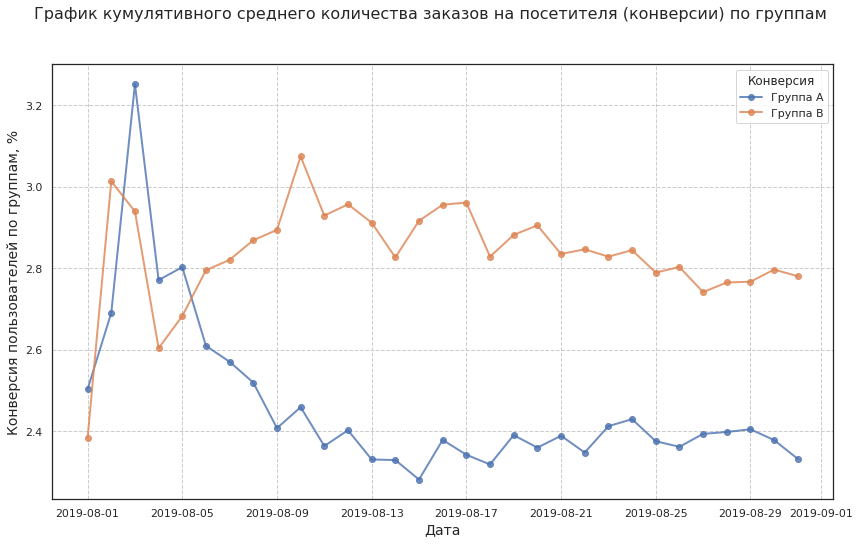

In [47]:
# построим график кумулятивного среднего количества заказов на посетителя (конверсии) по группам
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График кумулятивного среднего количества заказов на посетителя (конверсии) по группам', fontsize=16)
ax.plot(clear_cumulative_df['date'], clear_cumulative_df['cum_convers_a'] * 100, label='Группа А', marker='o', alpha=0.8, linewidth=2)
ax.plot(clear_cumulative_df['date'], clear_cumulative_df['cum_convers_b'] * 100, label='Группа B', marker='o', alpha=0.8, linewidth=2)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Конверсия пользователей по группам, %', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
ax.legend(title='Конверсия');

Построим в качестве дополнения график кумулятивного среднего чека по группам

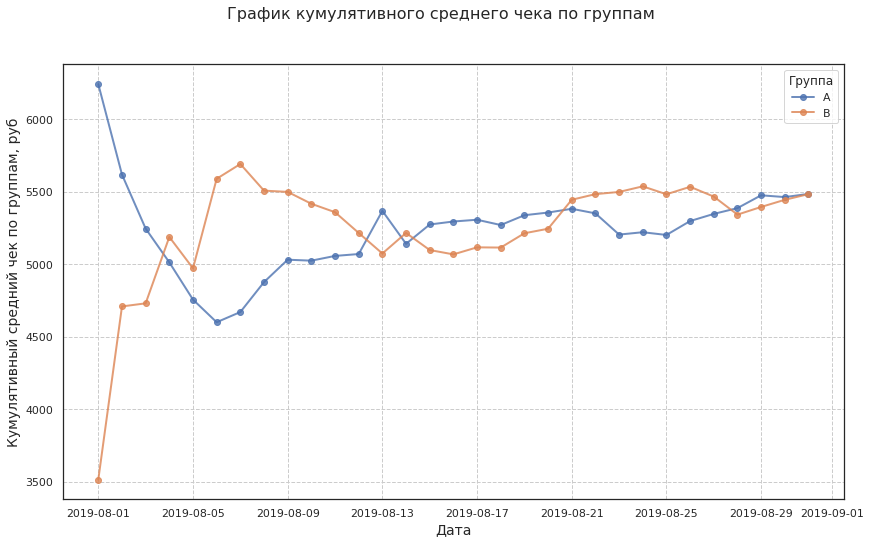

In [48]:
#построим график кумулятивного среднего чека по группам
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('График кумулятивного среднего чека по группам', fontsize=16)
ax.plot(clear_cumulative_df['date'], clear_cumulative_df['cum_mean_a'], label='А', marker='o', alpha=0.8, linewidth=2)
ax.plot(clear_cumulative_df['date'], clear_cumulative_df['cum_mean_b'], label='B', marker='o', alpha=0.8, linewidth=2)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Кумулятивный средний чек по группам, руб', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(cum_rev_df['date'], rotation=45, ha='right')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
ax.legend(title='Группа');

В выводах речь будет идти исключительно об интерпретации "очищенных" данных.

На графике относительной конверсии группы B к группе A видны сильные колебания в первой половине месяца. Во второй значения стабилизируются, и к концу теста держатся на уровне 15-20%. График относительного изменения кумулятивного среднего чека группы B к группе A, начиная с 14 августа так же показывает незначительные колебания с уменьшением амплитуды ближе к концу теста и приведением значений к практически одинаковым показателям. Оба графика показывают накопительные значения метрик, текущие значения которых по сути учитывают в себе все предыдущие данные. Одним из признаков сформировавшихся показателей метрик является фактор уменьшения амплитуды(разброса) значений, что и показали оба графика. На основе этого можно с определенной уверенностью заявить, что при одинаковом среднем чеке заказа, пользователи группы B по результатам теста совершают целевое действие (в данном случае создание заказа) на 15-20% чаще пользователей группы A.

Так же показателен график кумулятивной(накопительной) выручки по группам. Он наглядно показывает, что пользователи группы B при одинаковом среднем чеке, приносят выручку больше чем пользователи группы A. При этом, на протяжении всего теста, разрыв между накопительной выручкой между группами медленно, но верно увеличивается. Учитывая, что средний чек между группами одинаков, то можно утверждать, что на показатели кумулятивной(накопительной) выручки по группам влияние оказывает конверсия. Иными словами, конверсия определила лучшую группу в проведенном A/B-тесте и оказала решающее влиянние на разницу в выручке между группами.

Рассчет различий в среднем количестве заказов на посетителя между группами показал статистически значимую разницу между ними. Фактический рассчет относительного прироста конверсии группы B по отношению к группе A подтвердил это и выявил разницу в 19.2%.  Статистически значимые различия в среднем чеке заказа между группами обнаружены не были. Фактический расчет средних чеков двух групп показал, что средний чек группы A равен 5485 рублей, группы B 5483 рубля. Разница составила 2 рубля. Рассчет ститистической значимости этих метрик полностью подтвердили визуальный анализ графиков. 

Подытоживая, все выше сказанное, можно однозначно утверждать, что по результатам теста между группами есть разница в выручке. Тест можно остановить ввиду лучших показателей у группы B.

[Оглавление](#ogl)

<a id="conclusion_project"></a>
## Общие выводы по исследованию

В проекте, перед исследованием и анализом данных была проведена их предварительная обработка. Предобработка данных, это критически важный и необходимый этап, который необходимо провести перед началом анализа данных. Данный этап существенно повышает качество последующего анализа и что гораздо более важно – предотвращает получение искаженных, неверных данных и как следствие, формирование ошибочных выводов всего исследования. В процессе предобработки данных мы привели типы данных в соответствии их значениям, проверили их на пропуски и дубликаты. Так же были удалены пользователи, которые попали в обе группы, что противоречит правилам проведения A/B-тестов.

**Приоритизация гипотез.**
Приоритизация гипотез была проведена по двум методам: RICE и ICE. Отличие между этими методами в том, что метод RICE учитывает какое количество пользователей затронет проверка гипотезы.

По результатам приоритизации гипотез по методу ICE наиболее приоритетной гипотезой оказалась проверка гипотезы о необходимости *запустить акцию, дающую скидку на товар в день рождения*. По методу RICE гипотеза о необходимости *добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

Обе эти гипотезы объядиняет то, что они имеют очень высокую степень уверенности, среднюю стоимость проверки гипотезы, а так же высокое влияние на охваченых пользователей.

**Результаты проведения A/B-теста.**
Результаты A/B-теста показали различие в выручке между группами. Пользователи группы B при одинаковом среднем чеке заказа (расчет средних чеков двух групп показал, что средний чек группы A равен 5485 рублей, группы B 5483 рубля), имеют конверсию выше на 15-20% чем пользователи группы A. По сути, именно конверсия определила лучшую группу в проведенном A/B-тесте и оказала решающее влиянние на разницу в выручке между группами.

Глядя на графики кумулятивной выручки, кроме того, что показатели группы B очевидно лучше, обращает на себя внимание общая тенденция поведения пользователей обоих групп. Устойчивая тенденция увеличения выручки без каких-либо изломов наблюдается у обоих групп. Так же график кумулятивного среднего чека показывает положительную динамику у обоих групп пользователей. Все это в совокупности говорит о том, что обе группы пользователей достаточно хорошо показали себя при проведении теста.